# Вариант 3
ЭКЗАМЕН ПО АНАЛИЗУ И ВИЗУАЛИЗАЦИИ ДАННЫХ 

Дан файл «Sleep_efficiency_dataset». В файле дана такая информация о потребителях, как гендерная принадлежность, ВРЕМЯ СНА, ВРЕМЯ пробуждения, процент глубокого сна, и короткого сна, влияние алкоголя, кофеина и курения на сон и т.д.
Цель: провести информативный анализ и визуализацию по этим данным и дать заключение о том, какие влияния оказывают вредные привычки менее или более на эффективность сна в общем.


1.	Importing Libraries 
2.	Reading the data set
3.	Check the length of tuples
4.	Define table column names
5.	Descriptive statistics
6.	Identify a specific sample from the general population
7.	Display all information about all columns
8.	Checking any missing/null value in data
9.	Filling the null values
Vizualization:
10.	Visualize the age distribution (kdeplot)
11.	Show if there is a relationship between age and sleep efficiency (relplot)
12.	Make a visualization of the gender composition (countplot)
13.	Visualize information about smokers (countplot)
14.	Does smoking affect sleep patterns?
15.	What is the effect of drinking alcohol on sleep efficiency?
16.	Does caffeine consumption affect sleep?
17.	Does the number of times you wake up while sleeping have an effect on deep sleep?
18.	Does alcohol, smoking and exercise affect sleep patterns? (boxplot, relplot, kdeplot)

 
19.	Пункты 10-18  должны быть представлены в отчете Word в виде графика, остальные пункты  просто в виде текста (описательная часть, т.е. интерпретация должна быть в любом случае).


# Анализ эффективности сна

Целью данного отчета является провести информативный анализ и визуализацию по этим данным. Задача данного отчета - это определить:
    - Есть ли связь между возрастом и эффективностью сна?
    - Влияет ли курение на паттерны сна?
    - Какой эффект имеет потребление алкоголя на эффективность сна?
    - Влияет ли потребление кофеин на сон?
    - Влияет ли кол-во пробуждений во время сна на глубокий сон?
    - Имеют ли потребление алкоголя, курение и занятия спортом на паттерны сна?
Данный отчет является актуальным по множеству причин. В последнее время, качество сна среди население снижается с каждым годом. 
Данная тендеция особо заметна среди подростков и молодых взрослых.

In [1]:
import h3 
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px
import folium 
import os 
import random
import plotly.graph_objects as go
from folium import plugins
from tqdm import tqdm
from plotly.subplots import make_subplots
import missingno as msno 
import json
import geojson
import matplotlib
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

%matplotlib inline 
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
df = pd.read_csv('Sleep_efficiency_dataset.csv')
df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [3]:
len(df)

452

In [4]:
df.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

In [5]:
df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [6]:
df.sample(4)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
78,79,43,Male,2021-03-04 22:00:00,2021-03-04 05:00:00,7.0,0.79,20,70,10,4.0,0.0,0.0,No,3.0
41,42,52,Male,2021-05-08 01:30:00,2021-05-08 07:30:00,6.0,0.83,20,67,13,1.0,25.0,0.0,Yes,1.0
125,126,25,Male,2021-05-31 22:30:00,2021-05-31 06:30:00,8.0,0.77,28,51,21,2.0,25.0,0.0,No,3.0
267,268,30,Female,2021-10-26 22:30:00,2021-10-26 06:30:00,8.0,0.93,20,60,20,1.0,0.0,3.0,No,4.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [8]:
df.shape

(452, 15)

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [11]:
df.fillna(0, inplace = True)

In [12]:
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

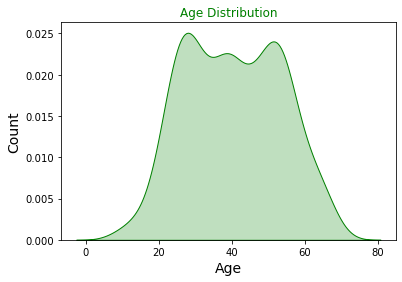

In [13]:
sns.kdeplot(data=df, x = 'Age', color = 'green', fill = True)
plt.xlabel('Age', color = 'black', fontsize = 14)
plt.ylabel('Count', color = 'black', fontsize = 14)
plt.title('Age Distribution', color = 'green', fontsize = 12)
plt.show()

Как вы можете заметить, возраст респондетов варьируется между 20 и 60. Наибольшее кол-во респондентов, как показывают данные, находятся в диапазоне 20-27 лет (примерно по графику) 

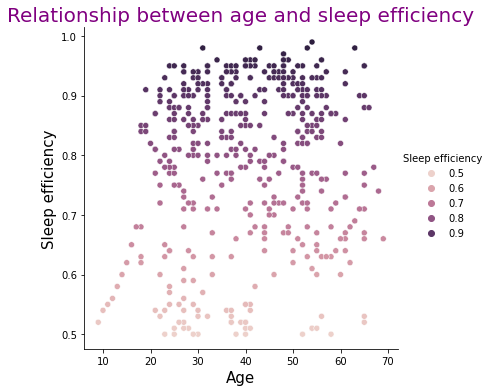

In [14]:
sns.relplot(data = df, x = 'Age', y = 'Sleep efficiency', hue = 'Sleep efficiency')
plt.xlabel('Age', color = 'black', fontsize = 15)
plt.ylabel('Sleep efficiency', color = 'black', fontsize = 15)
plt.title('Relationship between age and sleep efficiency', color = 'Purple', fontsize = 20)
plt.show()

По большей части, нет сильной зависимости возраста на качество сна. Единственное, что можно подметить, это тот факт, что у подростков наблюдается плохая эффективность сна

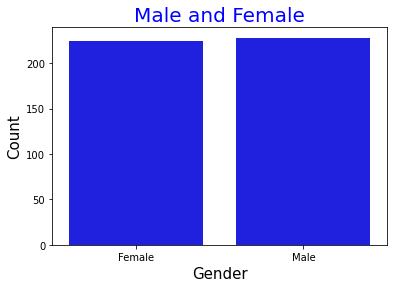

In [15]:
sns.countplot(data = df, x = 'Gender', color = 'blue')
plt.xlabel('Gender', color = 'black', fontsize = 15)
plt.ylabel('Count', color = 'black', fontsize = 15)
plt.title('Male and Female', color = 'blue', fontsize = 20)
plt.show()

Кол-во мужчин и женщин среди респондентов  практически идентично, мужчин лишь незначительно больше

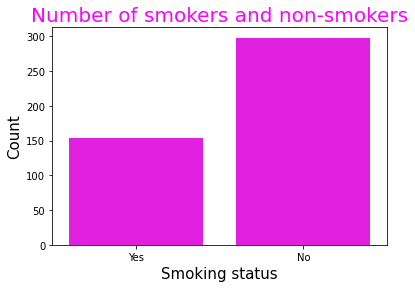

In [16]:
sns.countplot(data = df, x = 'Smoking status', color = 'magenta')
plt.xlabel('Smoking status', color = 'black', fontsize = 15)
plt.ylabel('Count', color = 'black', fontsize = 15)
plt.title('Number of smokers and non-smokers', color = 'magenta', fontsize = 20)
plt.show()

Большинство респондентов не курят

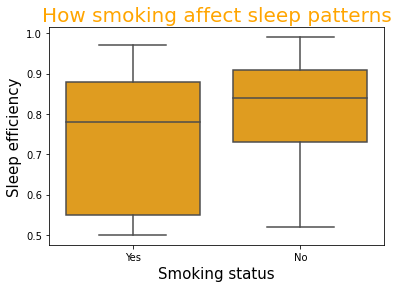

In [17]:
sns.boxplot(data=df, x = 'Smoking status', y = 'Sleep efficiency', color = 'orange')
plt.xlabel('Smoking status', color = 'black', fontsize = 15)
plt.ylabel('Sleep efficiency', color = 'black', fontsize = 15)
plt.title('How smoking affect sleep patterns', color = 'Orange', fontsize = 20)
plt.show()

Согласно данным, в среднем эффективность сна курящих респондентов меньше, чем у некурящих. Из этого можно сказать, что курение и вправду влияет на эффективность сна в негативном ключе

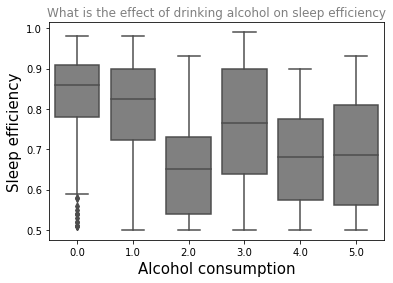

In [18]:
sns.boxplot(data=df, x = 'Alcohol consumption', y = 'Sleep efficiency', color = 'grey')
plt.xlabel('Alcohol consumption', color = 'black', fontsize = 15)
plt.ylabel('Sleep efficiency', color = 'black', fontsize = 15)
plt.title('What is the effect of drinking alcohol on sleep efficiency', color = 'Grey', fontsize = 12)
plt.show()

Данный график показывает, что алкоголь влияет на эффективность сна по разному. С одной стороны, те, у кого показатель потребления алкоголя равен двум склонны спать хуже, чем те, у кого этот показатель равен 4 либо 5. 

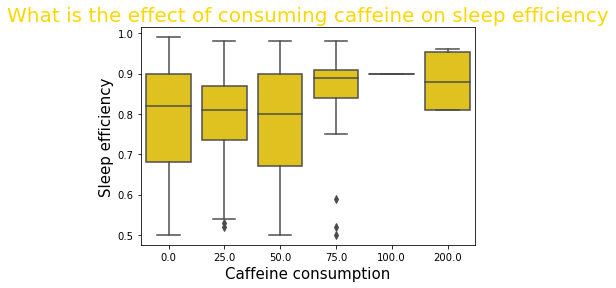

In [19]:
sns.boxplot(data=df, x = 'Caffeine consumption', y = 'Sleep efficiency', color = 'gold')
plt.xlabel('Caffeine consumption', color = 'black', fontsize = 15)
plt.ylabel('Sleep efficiency', color = 'black', fontsize = 15)
plt.title('What is the effect of consuming caffeine on sleep efficiency', color = 'gold', fontsize = 20)
plt.show()

Результаты по поводу кофеина тоже спорны. Ситуация схоже с потребление алкоголя. Нельзя сказать точно, влияет ли кофеин на эффективность сна положительно или негативно

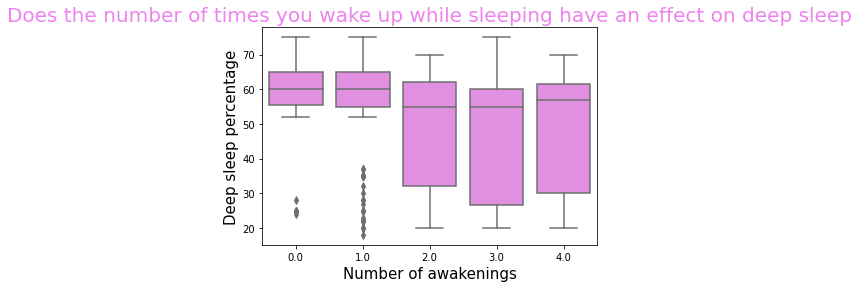

In [21]:
sns.boxplot(data=df, x = 'Awakenings', y = 'Deep sleep percentage', color = 'violet')
plt.xlabel('Number of awakenings', color = 'black', fontsize = 15)
plt.ylabel('Deep sleep percentage', color = 'black', fontsize = 15)
plt.title('Does the number of times you wake up while sleeping have an effect on deep sleep', color = 'violet', fontsize = 20)
plt.show()

Из графика однозначно можно сказать, что кол-во пробуждение влияет на глубокий сон. Чем меньше просыпается человек, тем лучше глубокий сон

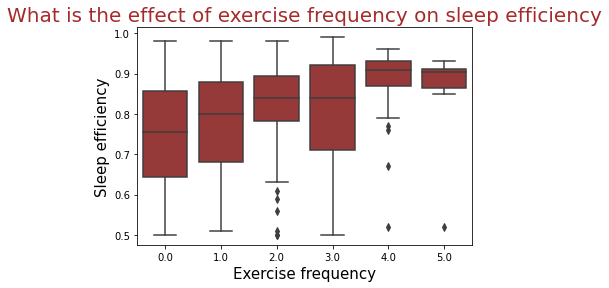

In [22]:
sns.boxplot(data=df, x = 'Exercise frequency', y = 'Sleep efficiency', color = 'brown')
plt.xlabel('Exercise frequency', color = 'black', fontsize = 15)
plt.ylabel('Sleep efficiency', color = 'black', fontsize = 15)
plt.title('What is the effect of exercise frequency on sleep efficiency', color = 'brown', fontsize = 20)
plt.show()

Согласно данным можно сделать вывод, что чем чаще тренируется человек, тем хуже эффективность его сна. Это логично, так как большая интенсивность тренировок влечет за собой большую утомленность и усталость

# Заключение

В заключении можно с уверенностью сказать, что результаты не совсем однозначны. Да, были подтверждены гипотезы касательно негативного эффекта высокой частоты тренировок и курения на качество сна. Кроме того, частые пробуждения действительно мешают глубокому сну. Однако, данные касательно потребления кофеина и алкоголя неоднозначны. Возможно, требуется большее кол-во респондентов, дабы исследование дало более точные результаты. В любом случае, по большей части анализ выдался успешным. 